## Import Relevant Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd


2022-03-21 13:11:15.626644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 13:11:15.626669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Parse Log file

In [19]:
def choose_log_file():
    data = list()
    for i in range(3):
        filename = f'./1 - Logs Here/access.log.{i+1}'
        file = open(filename, 'r')
        lines = file.read().splitlines()
        file.close()
        for line in lines:
            if not line:
                continue
            substring = '"-"'
            columns2 = [col.strip() for col in line.split('"-"') if col]
            while substring in columns2:
                columns2 = [col.strip() for col in columns2.split('"-"') if col]
            impData = columns2[0]
            impData2 = [col.strip() for col in impData.split(' - - ')]
            try:
                testString = impData2[1].split('"')
            except:
                continue
            date = testString[0].strip(' ')
            request = testString[1]
            requestResponseCode = testString[2].split(' ')

            try:
                requestResponseCodeShortened = requestResponseCode[1]
            except:
                requestResponseCodeShortened = np.nan

            if requestResponseCodeShortened == '200' or requestResponseCodeShortened == '201' or requestResponseCodeShortened == '202':
                columnToAdd = '0'
            else:
                columnToAdd = '1'
            data.append([impData2[0],date,request,requestResponseCodeShortened,columnToAdd])
        print('Log successfully parsed!')

        df = pd.DataFrame(data=data)
        return np.array(data), df

dataset, df = choose_log_file()

Log successfully parsed!


In [20]:
df

,0,1,2,3,4
0,66.249.67.197,[18/Jul/2011:03:35:52 -0500],GET /robots.txt HTTP/1.1,404,1
1,66.249.68.227,[18/Jul/2011:03:35:52 -0500],GET / HTTP/1.1,200,0
2,123.125.71.32,[18/Jul/2011:04:51:01 -0500],GET / HTTP/1.1,200,0
3,123.125.71.20,[18/Jul/2011:04:51:15 -0500],GET /?C=D;O=A HTTP/1.1,200,0
4,123.125.71.13,[18/Jul/2011:04:51:21 -0500],GET /log/ HTTP/1.1,200,0
...,...,...,...,...,...
481689,77.173.51.242,[10/Jan/2014:12:21:17 -0600],GET / HTTP/1.1,200,0
481690,208.94.145.109,[10/Jan/2014:12:21:19 -0600],HEAD / HTTP/1.1,200,0
481691,66.249.66.164,[10/Jan/2014:12:22:33 -0600],GET /docs/ijpp/Angelett.pdf HTTP/1.1,200,0
481692,81.100.51.75,[10/Jan/2014:12:33:28 -0600],GET /docs/ijpp/Philo_Courage.pdf HTTP/1.1,200,0


In [21]:
df.columns = ['IP', 'Datetime', 'Request', 'StatusCode', 'Target']
df = df.dropna()
df.shape

(481693, 5)

### Save Training Dataset into CSV (Optional)

In [ ]:
df.to_csv('./training_dataset.csv')

## Data Modeling

### Split dataset into classes and target

In [22]:
x = df.values[:,0:4]
y = df.values[:,4]
df.values[:,3:5] = df.values[:,3:5].astype(str)
print(x.shape)
print(y.shape)

(481693, 4)
(481693,)


### One hot encoding for classes

In [23]:
#encode the x dataset
# Get unique classes (encuentra los elementos unicos en el array).
x_dataset_base = x
y_dataset_base = y
x_dataset_ips = x_dataset_base[:,0]
x_dataset_dates = x_dataset_base[:,1]
uniqueValues = np.unique(x_dataset_ips)
classes = np.unique(x)
#for value in x_dataset_ips:

# Replace classes with integers.
x = np.searchsorted(classes, x)
inputColumnQuantityVariables = len(x[0])

#encode the y dataset
y = np.array(y.astype(int))

## Model

### Define Sequential Model

In [25]:
#  define the keras model
model = Sequential()
model.add(Dense(12, input_dim=inputColumnQuantityVariables, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=30, batch_size=50, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                60        
                                                                 
 dense_15 (Dense)            (None, 10)                130       
                                                                 
 dense_16 (Dense)            (None, 8)                 88        
                                                                 
 dense_17 (Dense)            (None, 6)                 54        
                                                                 
 dense_18 (Dense)            (None, 4)                 28        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 1)                

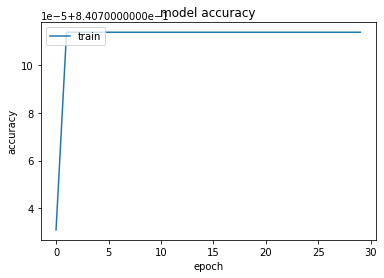

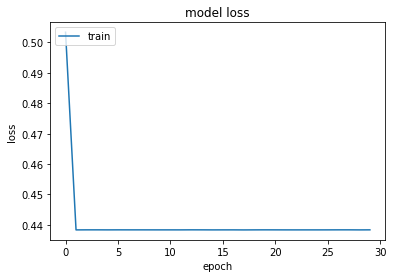

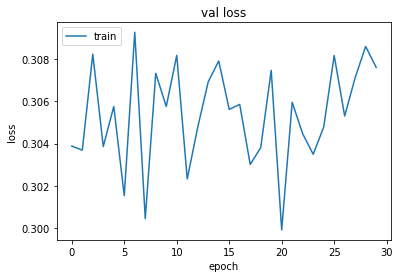

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
# evaluate the keras model
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

15053/15053 [==============================] - 12s 776us/step - loss: 0.4122 - accuracy: 0.8568
Accuracy: 85.68


In [32]:
model.save('./model.h5')